In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [6]:
data=pd.read_csv("telecom_churn.csv")
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [8]:
  data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [9]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [10]:
data.churn.value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [11]:
data=data.drop("customer_id",axis=1)


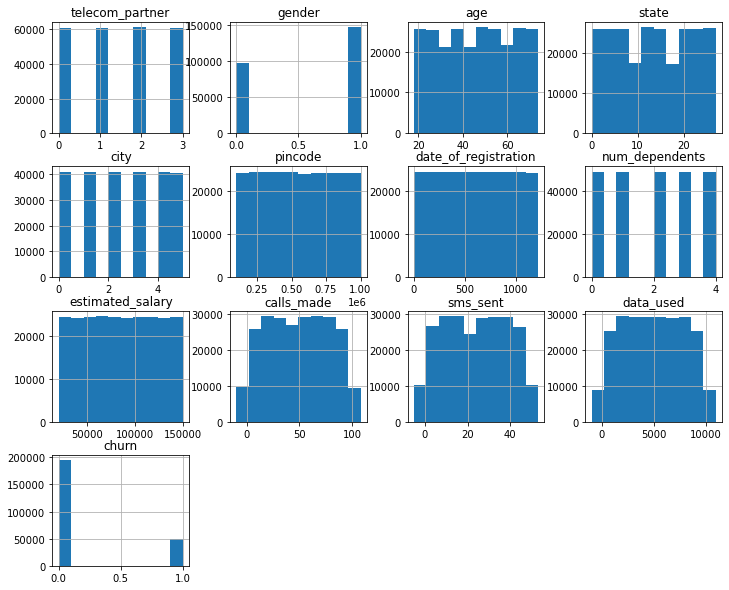

In [47]:
# Histograms for numerical columns
data.hist(figsize=(12, 10))
plt.show()

In [14]:
churn_data=data[data['churn']==1]['telecom_partner']
non_churn_data=data[data['churn']==0]['telecom_partner']

<AxesSubplot:ylabel='telecom_partner'>

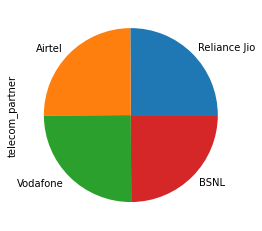

In [15]:
df.telecom_partner.value_counts().plot.pie()

<AxesSubplot:ylabel='churn'>

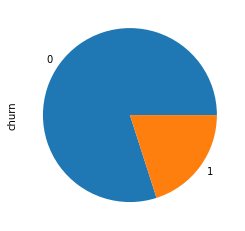

In [48]:
data.churn.value_counts().plot.pie()


### here we see in above pie Daigram  there 0=Churn take nearly 75 % Area and rest 25% is for Churn 1

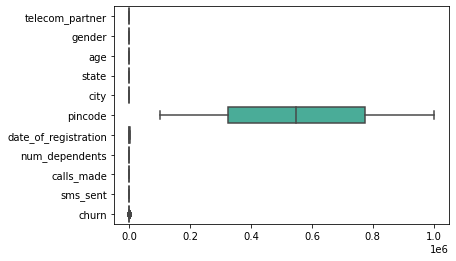

In [50]:
# Box plots for non numerical  columns
sns.boxplot(data=data.drop(['estimated_salary','data_used'],axis=1), orient='h')
plt.show()

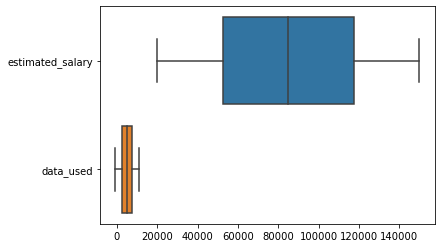

In [51]:
# Box plots for numerical columns
sns.boxplot(data=df[['estimated_salary','data_used']], orient='h')
plt.show()

In [16]:
churn_data

2             Vodafone
3                 BSNL
7                 BSNL
10              Airtel
16            Vodafone
              ...     
243523    Reliance Jio
243527            BSNL
243529    Reliance Jio
243533    Reliance Jio
243535            BSNL
Name: telecom_partner, Length: 48827, dtype: object

In [17]:
company_names=list(churn_data.value_counts().keys())
company_names

['Airtel', 'Reliance Jio', 'Vodafone', 'BSNL']

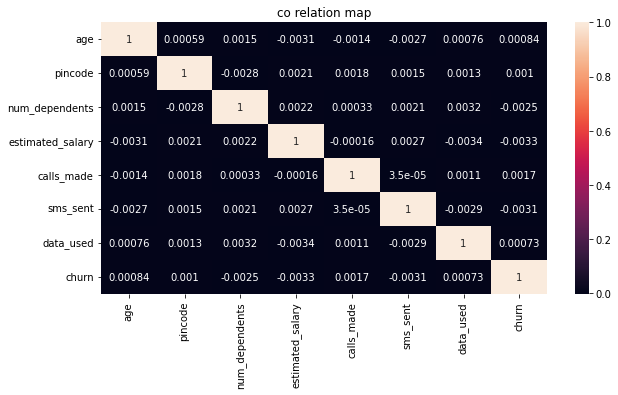

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.title("co relation map")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=model.fit_transform(data[i])

In [24]:
data.head()


,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


In [25]:
from sklearn.model_selection import train_test_split
x=data.drop("churn",axis=1)
y=data['churn']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler

model=StandardScaler()

x_train1=pd.DataFrame(model.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)

In [30]:
x_train1.shape

(170487, 12)

In [61]:
from sklearn.linear_model import LogisticRegression

classifier7 = LogisticRegression()
classifier7.fit(x_train,y_train)`

LogisticRegression()

In [63]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

print("accuracy ",classifier.score(x_test,y_test))

accuracy  0.49911039334300494


In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train , y_train)


classifier_rf.score(x_test,y_test)

0.7997290121260231

Text(33.0, 0.5, 'Truth')

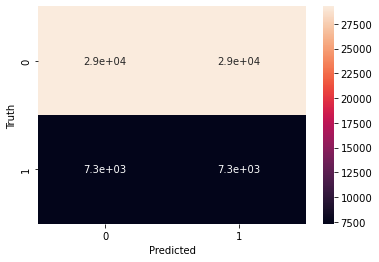

In [58]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')